In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import json
from Bio import SeqIO

In [2]:
mut_and_host_info_file = "../../../intermediate-results-downsampling/isolating_clade/african_mut_and_host_info_by_tip.json"
with open(mut_and_host_info_file, 'r') as infile:
    mut_and_host_info_by_tip = json.load(infile)

In [3]:
def extract_gene_lengths(genbank_file):
    gene_codons = {}
    for record in SeqIO.parse(genbank_file, "genbank"):
        for feature in record.features:
            if feature.type == "mat_peptide": 
                gene_name = feature.qualifiers.get("product", ["unknown"])[0]
                gene_name = gene_name.replace(' protein', "")
                gene_length = len(feature.location)
                gene_codons[gene_name.lower()] = gene_length / 3
            elif feature.type == "CDS":  
                gene_name = feature.qualifiers.get("gene", ["unknown"])[0]
                gene_length = len(feature.location)
                gene_codons[gene_name.lower()] = gene_length / 3
        gene_codons['rdrp'] = gene_codons.pop("rna-dependent rna polymerase")
        gene_codons['2Omethyltransferase'] = gene_codons.pop("2'-o-methyltransferase")
    return gene_codons

genbank_file = "../../../../nextstrain-build/phylogenetic_subsampling/defaults/mers_reference.gb"

gene_codon_counts = extract_gene_lengths(genbank_file)
gene_codon_counts["s1"] = 2196 / 3
gene_codon_counts["s2"] = 1806 / 3

print(gene_codon_counts["rdrp"])

933.0


In [4]:
all_genes = ["Nsp1",
                 "Nsp2",
                 "Nsp3",
                 "Nsp4",
                 "Nsp5",
                 "Nsp6",
                 "Nsp7",
                 "Nsp8",
                 "Nsp9",
                 "Nsp10",
                 "RdRpa",
                 "RdRpb",
                 "Hel",
                 "ExoN",
                 "NendoU",
                 "2Omethyltransferase",
                 "S1",
                 "S2",
                 "Orf3",
                 "Orf4a",
                 "Orf4b",
                 "Orf5",
                 "E",
                 "M",
                 "Orf8b",
                 "N"
                 ]

# for info in mut_and_host_info_by_tip.values():
#     for gene in list(info['muts_on_path'].keys()):
#         # if gene == '2Omethyltransferase' or gene == 'RdRpb':
#         #     continue 
#         if gene not in all_genes:
#             all_genes.append(gene)
# print(all_genes)

data = []
for tip, info in mut_and_host_info_by_tip.items():
    row = {'sample': tip, 'date': info['date']}
    for gene in all_genes:
        if gene == "RdRpa" or gene == "RdRpb":
            num_mutations = len(info['muts_on_path'].get("RdRpa", [])) + len(info['muts_on_path'].get("RdRpb", []))
            num_codons = gene_codon_counts["rdrp"] # default to 1 if gene not found
            mutation_rate = num_mutations / num_codons
            row["rdrp"] = mutation_rate
        else:
            num_mutations = len(info['muts_on_path'].get(gene, []))
            gene = gene.lower()
            if gene == "2omethyltransferase":
                num_codons = gene_codon_counts['2Omethyltransferase']
            else:
                num_codons = gene_codon_counts[gene]
            mutation_rate = num_mutations / num_codons
            row[gene] = mutation_rate
    data.append(row)

df = pd.DataFrame(data)
# df = df[df.host != 'Bat']
# df = df[df.host != 'Llama']
mutation_rate_by_gene = df.to_csv('../../../intermediate-results-downsampling/isolating_clade/mutation_rate_by_gene.csv')
print(df)

      sample         date      nsp1      nsp2      nsp3      nsp4      nsp5  \
0   KJ477102  2013.667770  0.000000  0.009091  0.006889  0.001972  0.003268   
1   OP712624  2016.684426  0.005181  0.009091  0.007419  0.005917  0.003268   
2   OP712625  2016.684426  0.005181  0.010606  0.007419  0.005917  0.003268   
3   KJ477103  2013.998630  0.005181  0.007576  0.007949  0.000000  0.006536   
4   OP906306  2013.998630  0.005181  0.007576  0.007419  0.000000  0.006536   
..       ...          ...       ...       ...       ...       ...       ...   
69  OK094450  2019.327397  0.010363  0.015152  0.011659  0.007890  0.006536   
70  OK094453  2019.327397  0.010363  0.015152  0.011659  0.007890  0.006536   
71  OK094449  2019.327397  0.010363  0.015152  0.011659  0.007890  0.006536   
72  OK094448  2019.327397  0.010363  0.015152  0.011659  0.007890  0.006536   
73  OK094452  2019.327397  0.010363  0.015152  0.011659  0.007890  0.006536   

        nsp6      nsp7      nsp8  ...        s1    

<Figure size 640x480 with 0 Axes>

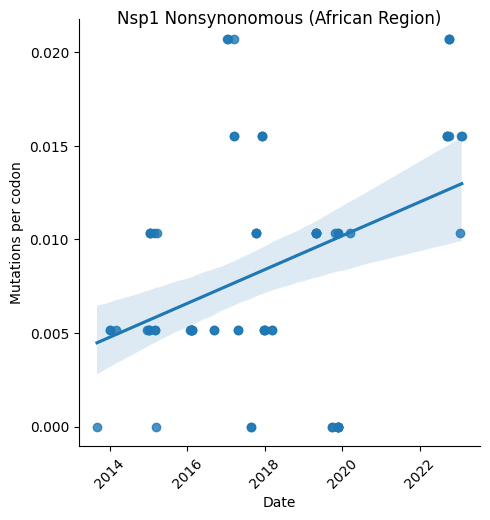

Camel slope: 0.0009020244142329677 mutations per codon per year
P = 0.0006600933253791645


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

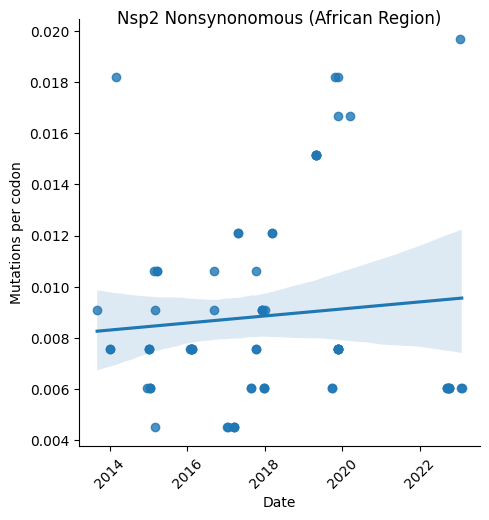

Camel slope: 0.00013722174950606727 mutations per codon per year
P = 0.4284592940752344


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

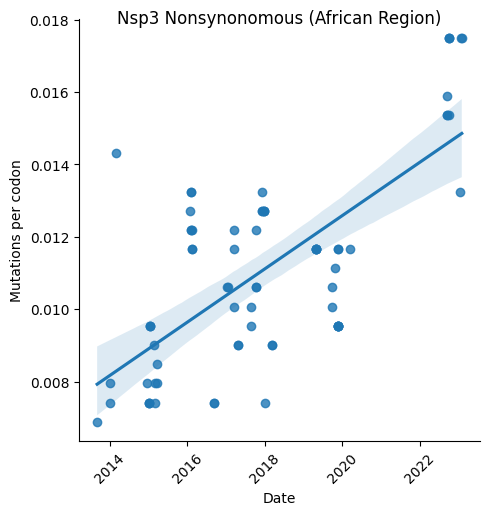

Camel slope: 0.000735407382642787 mutations per codon per year
P = 1.1118383291659407e-11


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

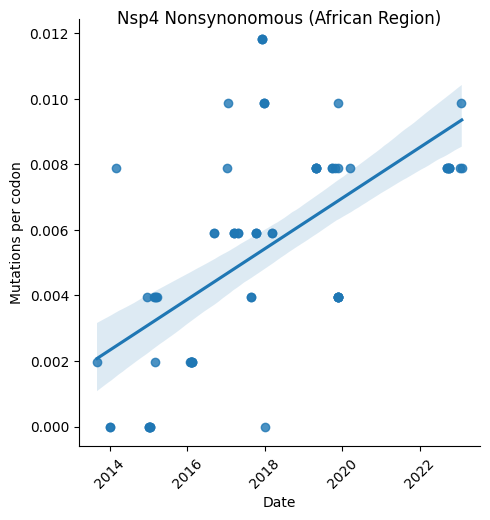

Camel slope: 0.0007721685554776401 mutations per codon per year
P = 7.422424210583822e-09


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

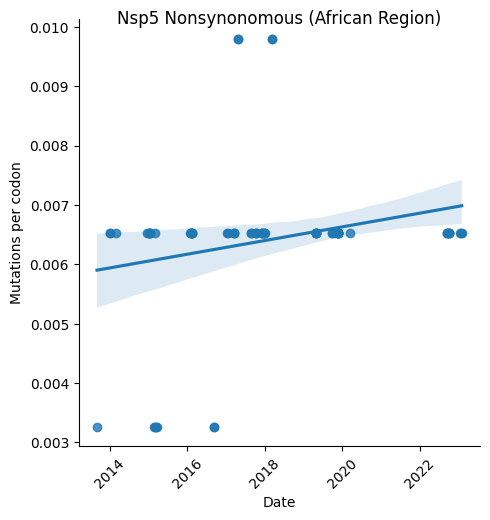

Camel slope: 0.00011512929837445529 mutations per codon per year
P = 0.04230813582208806


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

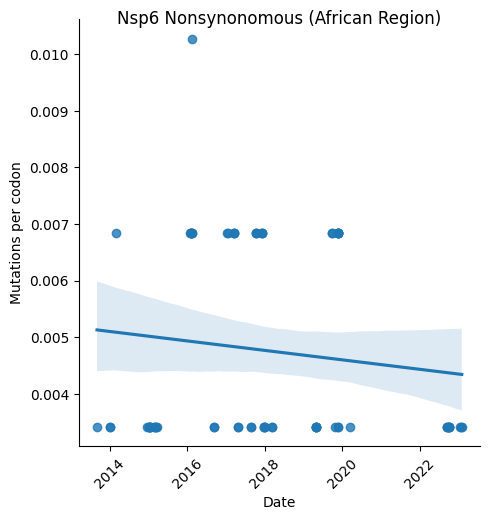

Camel slope: -8.341627365703916e-05 mutations per codon per year
P = 0.3011868389410692


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

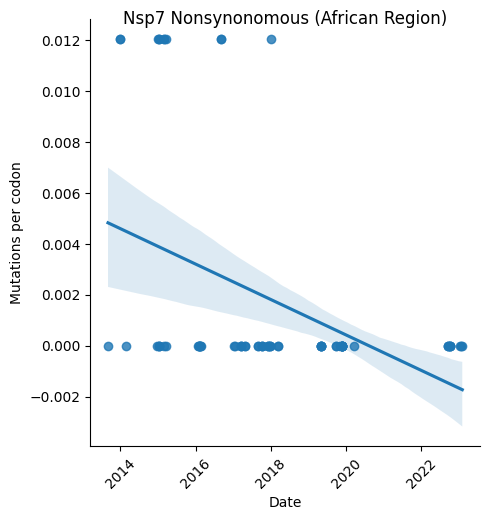

Camel slope: -0.0006950076236884841 mutations per codon per year
P = 0.0002129898408185089


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

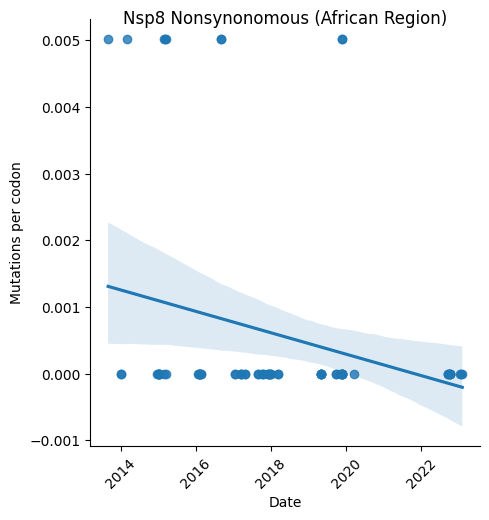

Camel slope: -0.00016058137012421383 mutations per codon per year
P = 0.030407355202459983


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

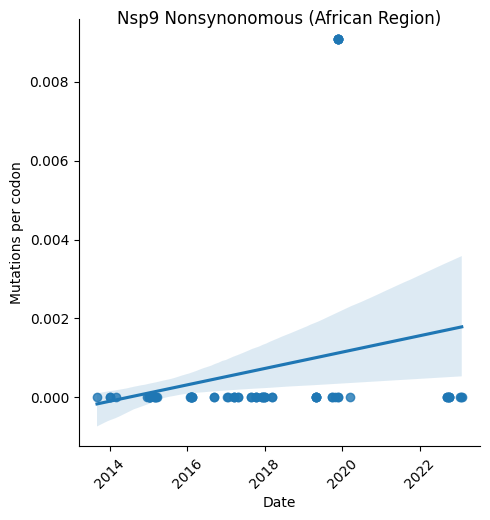

Camel slope: 0.00020717336971873672 mutations per codon per year
P = 0.06573231439853879


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

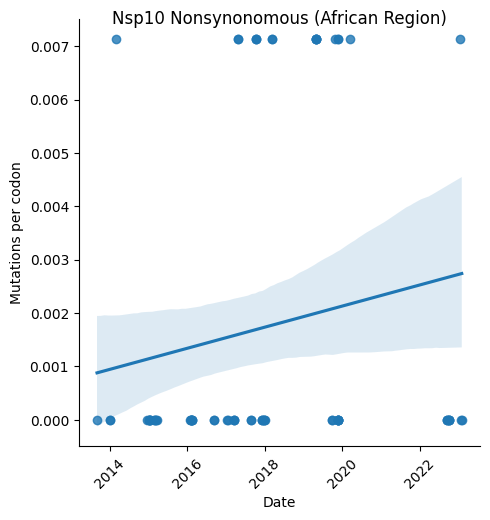

Camel slope: 0.000197545376957699 mutations per codon per year
P = 0.15736301111198467


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

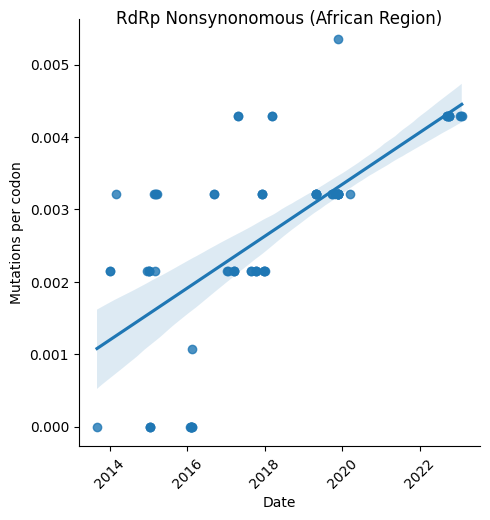

Camel slope: 0.00035793923408367566 mutations per codon per year
P = 4.436027148022715e-11


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

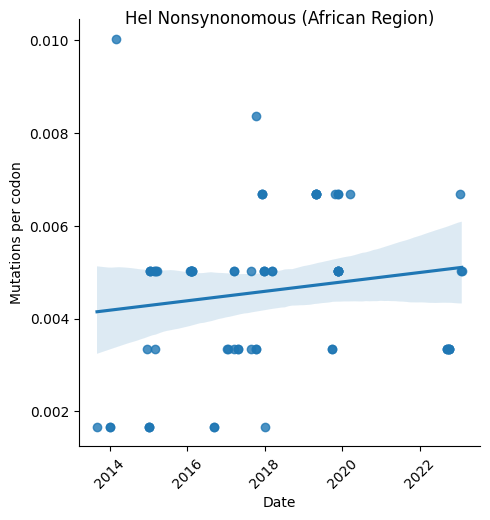

Camel slope: 0.00010149822961512314 mutations per codon per year
P = 0.18970720438404892


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

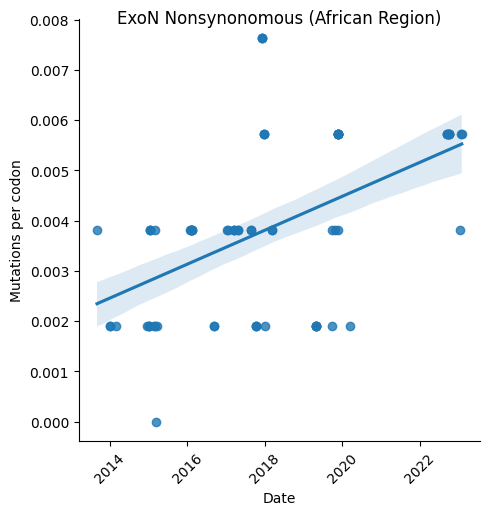

Camel slope: 0.0003372031675651056 mutations per codon per year
P = 2.791804447277755e-06


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

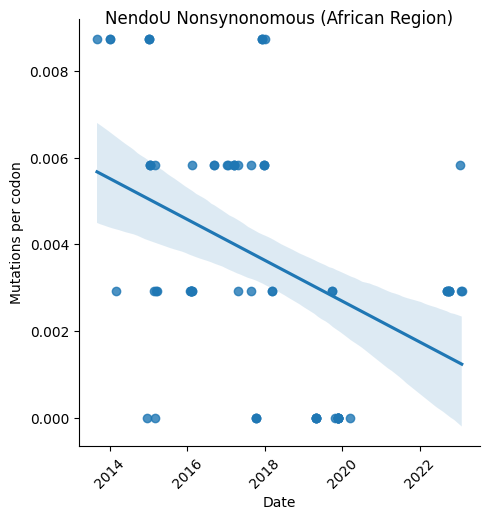

Camel slope: -0.0004705735405281292 mutations per codon per year
P = 0.00022018137775077354


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

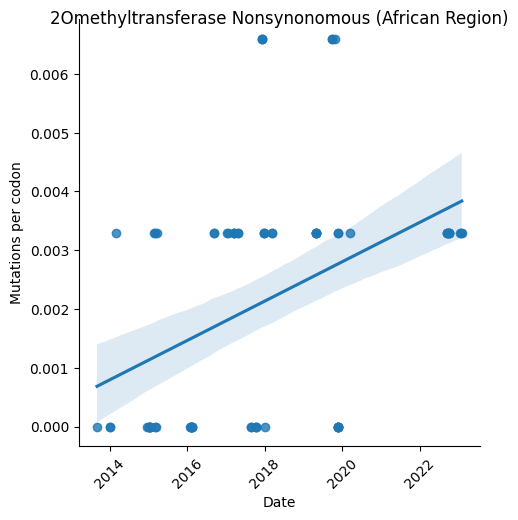

Camel slope: 0.00033451689173628316 mutations per codon per year
P = 0.00021017147712793137


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

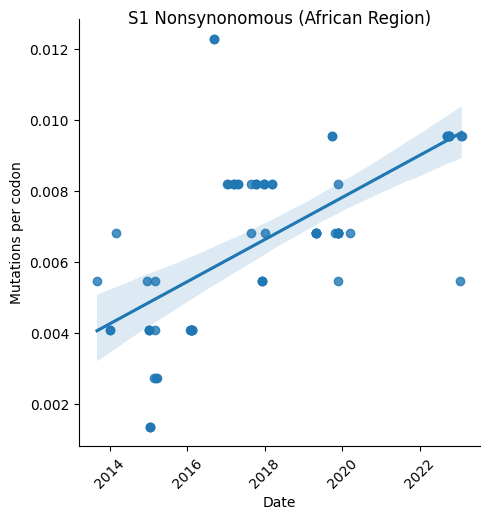

Camel slope: 0.000592860174512374 mutations per codon per year
P = 1.4110549420497698e-09


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

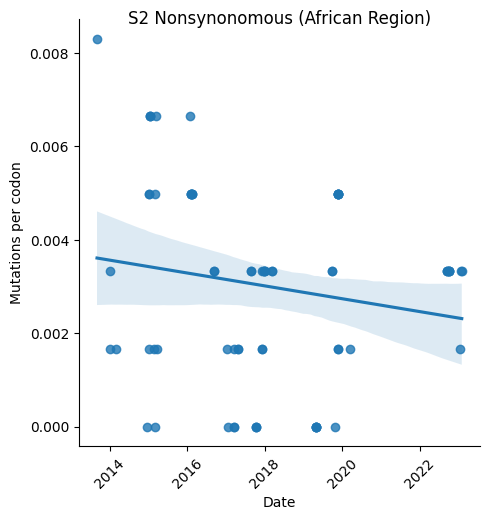

Camel slope: -0.0001375453831465361 mutations per codon per year
P = 0.14200513977937843


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

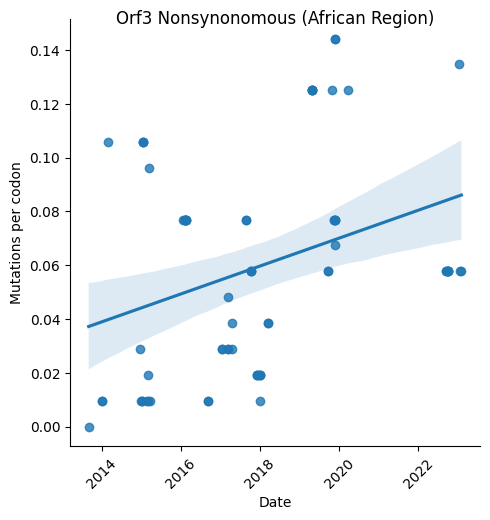

Camel slope: 0.005185613900770041 mutations per codon per year
P = 0.0030004272805801073


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

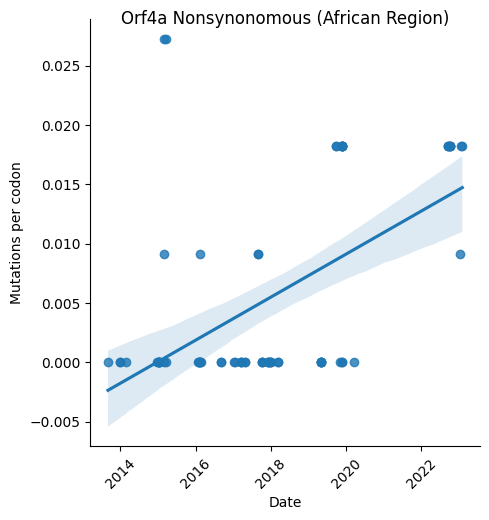

Camel slope: 0.0018123024947422522 mutations per codon per year
P = 3.085560331872684e-07


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

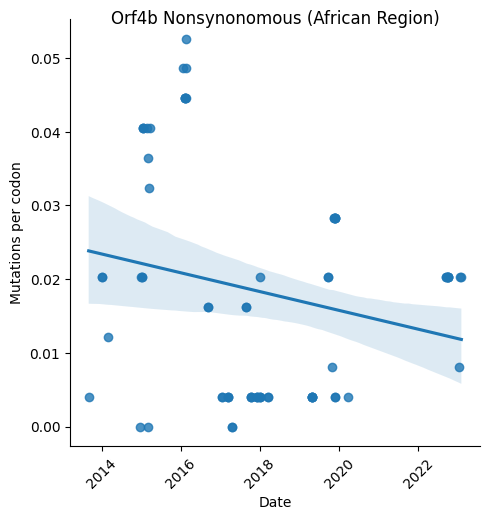

Camel slope: -0.001274918244407082 mutations per codon per year
P = 0.06202801627460078


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

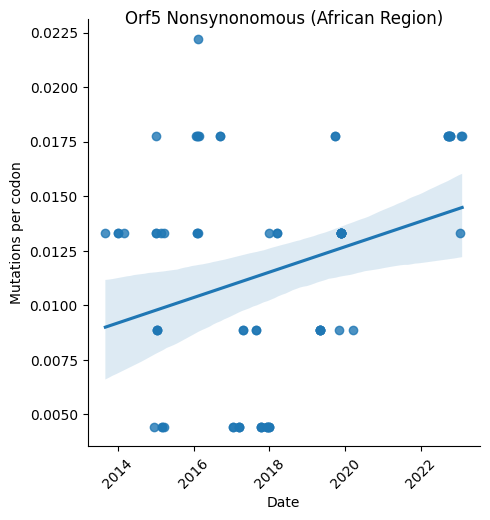

Camel slope: 0.0005819487983414833 mutations per codon per year
P = 0.010341214255005124


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

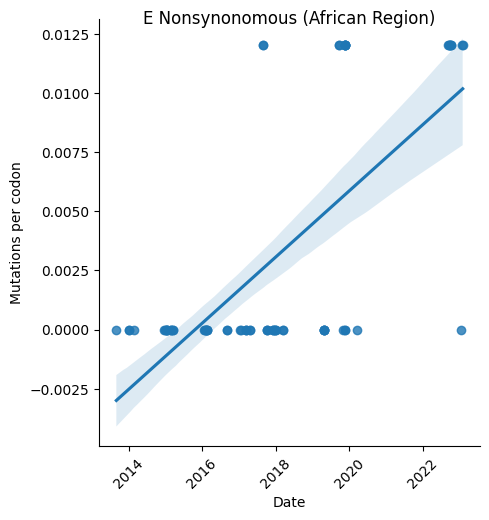

Camel slope: 0.0013977384051325939 mutations per codon per year
P = 1.8281363510411492e-11


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

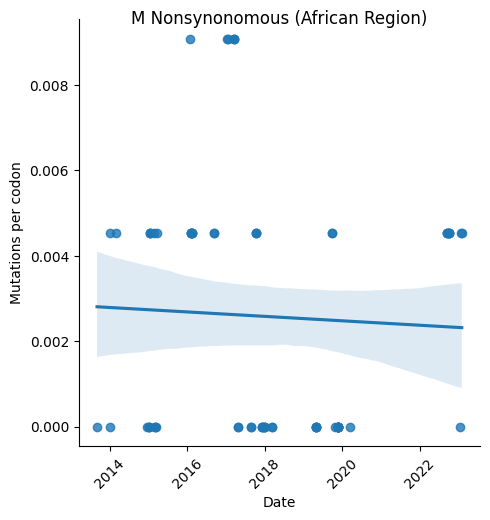

Camel slope: -5.189663580119877e-05 mutations per codon per year
P = 0.6967142856257275


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

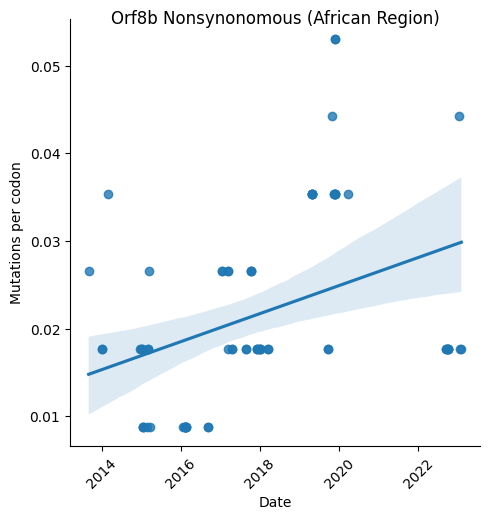

Camel slope: 0.0015984792783003837 mutations per codon per year
P = 0.0008112755565773004


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

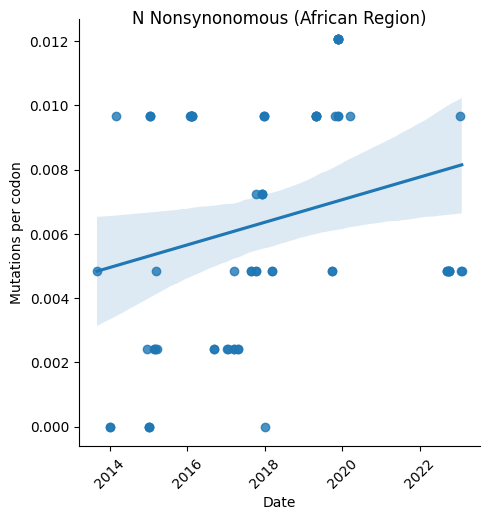

Camel slope: 0.00035144404376666615 mutations per codon per year
P = 0.031070175722603063
[0.0009020244142329677, 0.00013722174950606727, 0.000735407382642787, 0.0007721685554776401, 0.00011512929837445529, -8.341627365703916e-05, -0.0006950076236884841, -0.00016058137012421383, 0.00020717336971873672, 0.000197545376957699, 0.00035793923408367566, 0.00010149822961512314, 0.0003372031675651056, -0.0004705735405281292, 0.00033451689173628316, 0.000592860174512374, -0.0001375453831465361, 0.005185613900770041, 0.0018123024947422522, -0.001274918244407082, 0.0005819487983414833, 0.0013977384051325939, -5.189663580119877e-05, 0.0015984792783003837, 0.00035144404376666615]


<Figure size 640x480 with 0 Axes>

In [5]:
all_genes_simplified = ["Nsp1",
                 "Nsp2",
                 "Nsp3",
                 "Nsp4",
                 "Nsp5",
                 "Nsp6",
                 "Nsp7",
                 "Nsp8",
                 "Nsp9",
                 "Nsp10",
                 "RdRp",
                 "Hel",
                 "ExoN",
                 "NendoU",
                 "2Omethyltransferase",
                 "S1",
                 "S2",
                 "Orf3",
                 "Orf4a",
                 "Orf4b",
                 "Orf5",
                 "E",
                 "M",
                 "Orf8b",
                 "N"
                 ]

lin_regress = {}
lin_regress_all = {}
slopes = list(range(0, len(all_genes_simplified)))
count = 0
camel_df = df
for gene in all_genes_simplified:
    gene_lower = gene.lower()
    plt.figure(gene)
    plot = sns.lmplot(x="date", y=gene_lower, data=df)
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('Mutations per codon')
    plt.title(gene + ' Nonsynonomous (African Region)', y=0.97)
    plt.show()
    plt.savefig("../../../intermediate-results-downsampling/isolating_clade/mutation_rate_per_gene/" + gene + "figure.png")
    lin_regress[gene] = {}
    lin_regress_all[gene] = {}

    x=camel_df['date'].values
    y=camel_df[gene_lower].values
    camel_slope, camel_intercept, camel_r, camel_p, camel_se = stats.linregress(x, y)
    lin_regress[gene]['Camel'] = camel_slope
    lin_regress_all[gene]['Camel'] = {'slope':camel_slope, 'intercept':camel_intercept, 'r': camel_r, 'p': camel_p, 'se':camel_se}
    slopes[count] = camel_slope
    print("Camel slope: " + str(camel_slope) + " mutations per codon per year"),
    print("P = " + str(camel_p))
    count += 1

print(slopes)
df_results = pd.DataFrame(lin_regress)
df_results_all = pd.DataFrame(lin_regress_all)
linear_regression_results = df_results.to_csv('../../../intermediate-results-downsampling/isolating_clade/linear_regression_results.csv')
linear_regression_results_all = df_results_all.to_csv('../../../intermediate-results-downsampling/isolating_clade/linear_regression_results_all.csv')

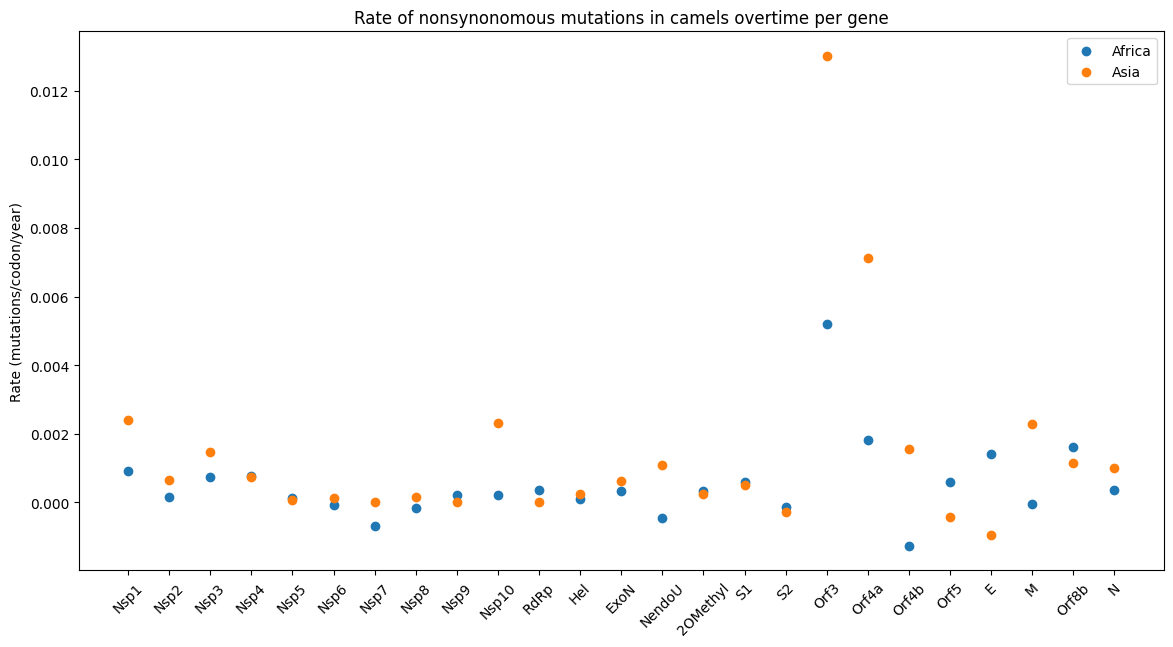

[0.0009020244142329677, 0.00013722174950606727, 0.000735407382642787, 0.0007721685554776401, 0.00011512929837445529, -8.341627365703916e-05, -0.0006950076236884841, -0.00016058137012421383, 0.00020717336971873672, 0.000197545376957699, 0.00035793923408367566, 0.00010149822961512314, 0.0003372031675651056, -0.0004705735405281292, 0.00033451689173628316, 0.000592860174512374, -0.0001375453831465361, 0.005185613900770041, 0.0018123024947422522, -0.001274918244407082, 0.0005819487983414833, 0.0013977384051325939, -5.189663580119877e-05, 0.0015984792783003837, 0.00035144404376666615]


In [6]:
gene_names = list(all_genes_simplified)
asian_slopes = [0.0023982317958661436, 0.0006375706239992616, 0.0014534494963091417, 0.0007416330529745921, 5.983976678965661e-05, 0.0001274257458742153, -5.67684835587131e-06, 0.0001583234449652371, 0.0, 0.0023123887250426443, 1.0290392085409527e-05, 0.00024902629332218627, 0.0006101192510357257, 0.0010959151651639516, 0.00022525199390662921, 0.0005050159232582716, -0.0002776487776005685, 0.013021325602871484, 0.007136563564961769, 0.0015504273054370427, -0.00043485147952865803, -0.0009689068600696392, 0.0022889306416712554, 0.001150868910089644, 0.001005190819421433]
for i in range(len(gene_names)):
    if gene_names[i] == '2Omethyltransferase':
        gene_names[i] = '2OMethyl'
plt.figure(figsize=(14,7))
plt.scatter(gene_names, slopes)
plt.scatter(gene_names, asian_slopes)
plt.xticks(rotation=45)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)
plt.ylabel("Rate (mutations/codon/year)")
plt.title("Rate of nonsynonomous mutations in camels overtime per gene")
plt.legend(["Africa", "Asia"])
plt.show()
print(slopes)